<a href="https://colab.research.google.com/github/yurizza/ecommerce-final-task-dicoding/blob/main/ecommerce_analysis_dicoding_final_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Cici Yuriza
- Email: ciciyuriza999@gmail.com
- Id Dicoding: yuriza

## Menentukan Pertanyaan Bisnis

Business Problem : **Analisis customers, sellers, products and orders untuk mengidentifikasi peluang peningkatan penjualan (September 2016 - Agustus 2018)**.

Objectives : **Tujuan analisis memahami demografi pelanggan, penjual, dan produk, serta tren penjualannya.**

Questions:

- Bagaimana demografi pelanggan ?
- Bagaimana demografi penjual ?
- Bagaimana order setiap tahunnya ?
- Produk apa yang paling banyak dan paling sedikit terjual (tidak termasuk status order 'canceled') ?
- Bagaimana trend product terjual setiap tahunnya (tidak termasuk status order 'canceled')?
- Produk apa yang paling banyak di cancel ?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Menyiapkan semua library yang dibutuhkan

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Access to gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#folder path in drive
folder_path = "/content/drive/MyDrive/dicoding/project_analisis_data/E-Commerce Public Dataset/"

## Data Wrangling

### Gathering Data

Data telah disediakan oleh pihak dicoding, dapat diakses melalui tautan berikut : [E-Commerce Public Dataset](https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view). Setelah mengakses dataset, maka selanjutnya memuat (load) beberapa tabel (customer, seller, product, order dan order item) yang dibutuhkan dalam analisa.


#### Customers

In [ ]:
# Load customer dataset
customers_df = pd.read_csv(folder_path + 'customers_dataset.csv')

# Show 5 first data
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Sellers

In [ ]:
# Load seller dataset
sellers_df = pd.read_csv(folder_path + 'sellers_dataset.csv')

# Show 5 first data
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Products

In [ ]:
# Load products dataset
products_df = pd.read_csv(folder_path + 'products_dataset.csv')

# Show 5 first data
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Orders

In [ ]:
# Load orders dataset
orders_df = pd.read_csv(folder_path + 'orders_dataset.csv')

# Show 5 first data
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Orders Items

In [ ]:
# Load order_items dataset
order_items_df = pd.read_csv(folder_path + 'order_items_dataset.csv')

# Show 5 first data
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

Akan dilakukan pengecekan data seperti missing value, duplicate dan berbagai masalah yang mungkin terjadi.

#### Customers

In [ ]:
# check info data customer
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# check duplicate
customers_df.duplicated().sum()

0

there is no missing value in customer dataset.

there is no duplicate in customer dataset.

#### Sellers

In [ ]:
# check info sellers dataset
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# check duplicate
sellers_df.duplicated().sum()

0

there is no missing value.

there is no duplicate in sellers dataset.

#### Products

In [ ]:
# check info products dataset
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# Check missing value
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
# check duplicate
products_df.duplicated().sum()

0

there is no duplicated in products.

there are missing value in products.

#### Orders

In [ ]:
# Check info orders dataset
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# Check missing value
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
# Check duplicate
orders_df.duplicated().sum()

0

there are missing value.

there is no duplicate data.

order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date memiliki tipe data objek sehingga harus diganti ke datetime.

#### Order Items

In [ ]:
# Check info order items dataset
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
# Check duplicate
order_items_df.duplicated().sum()

0

there is no missing value.

there is no dupicate data in order_items.

shipping_limit_date memiliki tipe data object harus diubah ke datetime.

### Cleaning Data

dont forget step for cleaning data:
define, check and test

#### Product

In [ ]:
# show info dataset product
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# read csv for product category name in english
product_category_in_english = pd.read_csv(folder_path + 'product_category_name_translation.csv')

products_df = pd.merge(products_df, product_category_in_english, how='left', on='product_category_name')

In [ ]:
# Show 5 fisrt data with missing value
products_df[products_df.product_category_name.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0,NaN
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0,NaN


Terdapat korelasi antara nilai yang hilang pada kolom product_category_name dengan nilai yang hilang pada kolom product_name_lenght, product_description_lenght, dan product_photos_qty.

In [ ]:
# drop column 'product_category_name'
products_df = products_df.drop(columns=['product_category_name'])

# rename column
products_df = products_df.rename(columns={'product_category_name_english' : 'product_category_name'})

products_df.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
# Fill the missing values in the product_category_name column with the "undefined" category.
# This is because there are 610 data points with missing values, and we do not want to drop them.
products_df['product_category_name'].fillna('undefined', inplace=True)

# fill product_name_lenght, product_description_lenght, product_photos_qty with mean
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean(), inplace=True)
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mean(), inplace=True)

# check missing value
products_df.isna().sum()

product_id                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
product_category_name         0
dtype: int64

In [ ]:
# Show 5 fisrt data with missing value
products_df[products_df.product_weight_g.isna()].head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
8578,09ff539a621711667c43eba6a3bd8466,60.000000,865.000000,3.000000,NaN,NaN,NaN,NaN,baby
18851,5eb564652db742ff8f28759cd8d2652a,48.476949,771.495285,2.188986,NaN,NaN,NaN,NaN,undefined


Terdapat korelasi antara nilai yang hilang pada kolom product_weight_g dengan nilai yang hilang pada product_length_cm, product_height_cm, product_width_cm

In [ ]:
# fill product_weight_g, product_length_cm, product_height_cm, product_width_cm with mean
products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean(), inplace=True)

# Check missing value
products_df.isna().sum()

product_id                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
product_category_name         0
dtype: int64

no more missing value in products dataset

#### order

In [ ]:
# Convert object columns to datetime
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in date_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
# drop unnecessary colums
columns_to_drop = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']
orders_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# check dataset
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.8+ MB


There is no missing value

Successfully changed the data type.

#### Order items

In [ ]:
# Convert data type to datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [ ]:
# Check info order items dataset
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Successfully changed the data type.

## Exploratory Data Analysis (EDA)

#### Explore customers

In [ ]:
# show 5 first data
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Show unique customer_state
customers_df['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [ ]:
# Add a new column with the full name of the country from the state code
# state_names dictionary
state_names = {
    'SP': 'São Paulo',
    'SC': 'Santa Catarina',
    'MG': 'Minas Gerais',
    'PR': 'Paraná',
    'RJ': 'Rio de Janeiro',
    'RS': 'Rio Grande do Sul',
    'PA': 'Pará',
    'GO': 'Goiás',
    'ES': 'Espírito Santo',
    'BA': 'Bahia',
    'MA': 'Maranhão',
    'MS': 'Mato Grosso do Sul',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'RN': 'Rio Grande do Norte',
    'PE': 'Pernambuco',
    'MT': 'Mato Grosso',
    'AM': 'Amazonas',
    'AP': 'Amapá',
    'AL': 'Alagoas',
    'RO': 'Rondônia',
    'PB': 'Paraíba',
    'TO': 'Tocantins',
    'PI': 'Piauí',
    'AC': 'Acre',
    'SE': 'Sergipe',
    'RR': 'Roraima'
}

# Assuming state_codes list is defined
state_codes = customers_df['customer_state'].tolist()

# To get the state name from the abbreviation
customers_df['customer_state_full'] = [state_names[code] for code in state_codes]

In [ ]:
# calculate total custumers
amount_of_customers = customers_df['customer_id'].nunique()

# calculate total unique customers
amount_of_unique_customers = customers_df['customer_unique_id'].nunique()

print('Total customer = ', amount_of_customers)
print('Total Unique Customers', amount_of_unique_customers)

Total customer =  99441
Total Unique Customers 96096


Total unique customer adalah 96096.

Ada 3345 akun yang tidak unique (dimiliki oleh user yang sama)

In [ ]:
# Show total customer per state
customers_df['customer_state_full'].value_counts()

São Paulo              41746
Rio de Janeiro         12852
Minas Gerais           11635
Rio Grande do Sul       5466
Paraná                  5045
Santa Catarina          3637
Bahia                   3380
Distrito Federal        2140
Espírito Santo          2033
Goiás                   2020
Pernambuco              1652
Ceará                   1336
Pará                     975
Mato Grosso              907
Maranhão                 747
Mato Grosso do Sul       715
Paraíba                  536
Piauí                    495
Rio Grande do Norte      485
Alagoas                  413
Sergipe                  350
Tocantins                280
Rondônia                 253
Amazonas                 148
Acre                      81
Amapá                     68
Roraima                   46
Name: customer_state_full, dtype: int64

**São Paulo, Rio de Janeiro, Minas Gerais, Rio Grande do Sul, Paraná** merupakan 5 negara yang paling banyak customer, sedangkan **Rondônia, Amazonas, Acre, Amapá, Roraima** merupakan 5 negara customer paling sedikit. *italicized text*

In [ ]:
# To group customers by customer_city, and customer_state
result = customers_df.groupby(['customer_city', 'customer_state_full'])['customer_id'].count().reset_index().sort_values(by='customer_id', ascending=False)
result = result.rename(columns={'customer_id': 'amount_of_customers'})
result

,customer_city,customer_state_full,amount_of_customers
3758,sao paulo,São Paulo,15540
3281,rio de janeiro,Rio de Janeiro,6882
469,belo horizonte,Minas Gerais,2773
587,brasilia,Distrito Federal,2131
1187,curitiba,Paraná,1521
...,...,...,...
1356,ewbank da camara,Minas Gerais,1
2307,marechal deodoro,Alagoas,1
1360,fagundes,Paraíba,1
1361,farol,Paraná,1



Jika dilihat berdasarkan city maka **sao paulo, rio de janeiro, belo horizonte, brasilia, curitiba** merupakan 5 kota yang paling banyak customer, sedangkan kota-kota customer paling sedikit hanya 1 customer.


In [ ]:
# Calculate the total number of unique cities in each state.
customer_unique_city_per_state = customers_df.drop_duplicates(subset=['customer_state_full', 'customer_city']).groupby('customer_state_full').size().reset_index(name='city_count').sort_values(by='city_count', ascending=False)
customer_unique_city_per_state

,customer_state_full,city_count
12,Minas Gerais,745
25,São Paulo,629
19,Rio Grande do Sul,379
13,Paraná,364
4,Bahia,353
23,Santa Catarina,240
8,Goiás,178
5,Ceará,161
16,Pernambuco,152
20,Rio de Janeiro,149


**Minas Gerais, São Paulo,Rio Grande do Sul,Paraná, Bahia** Merupakan 5 negara dengan kota yang paling banyak.

**jika dilihat berdasarkan negara maka state paling banyak customer adalah Sao Paulo mencapai lebih dari 41% total customer. Dengan kotanya sao paulo mencapai lebih dari 37% customer dari total customer di negara sao paulo.**

#### Explore Sellers

In [ ]:
# Show 5 first data
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
# calculate total seller
amount_of_sellers = sellers_df['seller_id'].nunique()

print('Total Seller = ', amount_of_sellers)

Total Seller =  3095


Total Seller adalah 3095

In [ ]:
# Assuming state_codes list is defined
state_code_sellers = sellers_df['seller_state'].tolist()

# get the state name from the abbreviation
sellers_df['seller_state_full'] = [state_names[code] for code in state_code_sellers]

In [ ]:
# calculate the total seller in each state
sellers_df['seller_state_full'].value_counts()

São Paulo              1849
Paraná                  349
Minas Gerais            244
Santa Catarina          190
Rio de Janeiro          171
Rio Grande do Sul       129
Goiás                    40
Distrito Federal         30
Espírito Santo           23
Bahia                    19
Ceará                    13
Pernambuco                9
Paraíba                   6
Rio Grande do Norte       5
Mato Grosso do Sul        5
Mato Grosso               4
Rondônia                  2
Sergipe                   2
Piauí                     1
Acre                      1
Maranhão                  1
Amazonas                  1
Pará                      1
Name: seller_state_full, dtype: int64

Ada 23 state dimana paling banyak seller berasal dari Sao Paulo. Kemudian Parana dan Minas Gerais.

In [ ]:
# clculate the total seller in each city
sellers_city_df = sellers_df.groupby(['seller_city', 'seller_state_full'])['seller_id'].count().reset_index(name='seller_count').sort_values(by='seller_count', ascending=False)
sellers_city_df.head()

,seller_city,seller_state_full,seller_count
540,sao paulo,São Paulo,694
164,curitiba,Paraná,124
471,rio de janeiro,Rio de Janeiro,93
65,belo horizonte,Minas Gerais,66
461,ribeirao preto,São Paulo,52


Ada 636 kota, dimana jumlah seller paling banyak ada di kota Sao Paulo yaitu 694, kemudian kota curitiba 127 seller dan Rio De Janeiro dengan 93 seller.

In [ ]:
# calculate the unique city in each state
seller_unique_city_per_state = sellers_df.drop_duplicates(subset=['seller_state_full', 'seller_city']).groupby('seller_state_full').size().reset_index(name='city_count').sort_values(by='city_count', ascending=False)
seller_unique_city_per_state

,seller_state_full,city_count
22,São Paulo,261
10,Minas Gerais,82
11,Paraná,67
20,Santa Catarina,65
17,Rio Grande do Sul,51
18,Rio de Janeiro,38
6,Goiás,12
2,Bahia,12
5,Espírito Santo,11
3,Ceará,7


Jumlah city pada masing-masing state beragam dimana paling banyak di state Sao Paulo dengan 261 kota. Kemudian paling sedikit ada 5 state dimana masing-masing hanya ada satu kota.

Paling banyak seller ada di negara sao paulo mencapai 59% dari total seller, dimana disana ada 261 kota dan paling banyak seller ada di kota sao paulo yaitu 694 seller.

#### Explore Orders dan customers

In [ ]:
# merge customers and orders, where the order is not canceled
orders_customers_df = pd.merge(orders_df[orders_df['order_status'] != 'canceled'], customers_df, how='left', on='customer_id')

In [ ]:
# get year from order_purchase_year
orders_customers_df['order_purchase_year'] = pd.to_datetime(orders_customers_df['order_purchase_timestamp']).dt.year

In [ ]:
# Show 5 first data
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_state_full,order_purchase_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,São Paulo,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Bahia,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Goiás,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Rio Grande do Norte,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,São Paulo,2018


In [ ]:
# calculate total order in each state
orders_customers_df['customer_state_full'].value_counts()

São Paulo              41419
Rio de Janeiro         12766
Minas Gerais           11571
Rio Grande do Sul       5441
Paraná                  5023
Santa Catarina          3618
Bahia                   3364
Distrito Federal        2133
Espírito Santo          2024
Goiás                   2007
Pernambuco              1647
Ceará                   1329
Pará                     971
Mato Grosso              905
Maranhão                 743
Mato Grosso do Sul       713
Paraíba                  534
Piauí                    491
Rio Grande do Norte      485
Alagoas                  412
Sergipe                  349
Tocantins                279
Rondônia                 250
Amazonas                 148
Acre                      81
Amapá                     68
Roraima                   45
Name: customer_state_full, dtype: int64

In [ ]:
# calculate the total order in each year (2016 - 2018)
orders_customers_df.groupby('order_purchase_year')['order_id'].count()

order_purchase_year
2016      303
2017    44836
2018    53677
Name: order_id, dtype: int64

Jumlah order per tahun selalu meningkat.

In [ ]:
# calculate the total order per year in each city
order_per_year = orders_customers_df.groupby(['order_purchase_year','customer_city', 'customer_state_full'])['order_id'].count().reset_index(name='count_order').sort_values(by='count_order', ascending=False)

order_per_year.head()

,order_purchase_year,customer_city,customer_state_full,count_order
6526,2018,sao paulo,São Paulo,9035
3141,2017,sao paulo,São Paulo,6332
6155,2018,rio de janeiro,Rio de Janeiro,3485
2765,2017,rio de janeiro,Rio de Janeiro,3320
3949,2018,belo horizonte,Minas Gerais,1545


In [ ]:
# get maximum order per year
max_order_per_year = order_per_year.loc[order_per_year.groupby('order_purchase_year')['count_order'].idxmax()]

# show maximum order per year
max_order_per_year

,order_purchase_year,customer_city,customer_state_full,count_order
148,2016,sao paulo,São Paulo,33
3141,2017,sao paulo,São Paulo,6332
6526,2018,sao paulo,São Paulo,9035


1. State paling banyak melakukan order adalah Sao Pulo, Rio de Janeiro dan Minas Gerais.
2. Acre, Amapá, Roraima adalah negara yang paling sedikit order.
3. Setiap tahunnya kota Sao Paulo adalah kota yang paling banyak order.

#### Explore order items, orders dan product by excluding orders with the status 'canceled' focus on product category name

In [ ]:
# melakukan merge/ join antar order_items dengan product dimana status order tidak 'cancel'
# merge order items dan orders
merged_df = pd.merge(order_items_df, orders_df[orders_df['order_status'] != 'canceled'], how='inner', on='order_id')
merged_df = pd.merge(merged_df, products_df, how='inner', on=['product_id'])

In [ ]:
# show information of merged dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112108 entries, 0 to 112107
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112108 non-null  object        
 1   order_item_id                  112108 non-null  int64         
 2   product_id                     112108 non-null  object        
 3   seller_id                      112108 non-null  object        
 4   shipping_limit_date            112108 non-null  datetime64[ns]
 5   price                          112108 non-null  float64       
 6   freight_value                  112108 non-null  float64       
 7   customer_id                    112108 non-null  object        
 8   order_status                   112108 non-null  object        
 9   order_purchase_timestamp       112108 non-null  datetime64[ns]
 10  order_estimated_delivery_date  112108 non-null  datetime64[ns]
 11  

In [ ]:
# calculate statistical descriptive
merged_df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112108.000000,112108.000000,112108.000000,112108.000000,112108.000000,112108.000000,112108.000000,112108.000000,112108.000000,112108.000000
mean,1.197345,120.387559,19.991964,48.784617,787.680406,2.210273,2093.573541,30.154562,16.584516,22.994742
std,0.704291,182.661658,15.797391,9.946987,647.340581,1.709950,3750.981753,16.151512,13.434322,11.699814
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.940000,16.270000,51.000000,610.000000,2.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


1. Total ada **112108 product terjual**. Dimana dalam satu transaksi minimal pembelian 1 product dan paling banyak ada 21 produk dengan rata-rata membeli 1 produk.

2. Harga **minimal** product yang dibeli adalah `R$0.85`, **maksimal** `R$6735` dengan **rata-rata** sekitar `R$120.38`.

3. untuk freigh value rata-rata menghabiskan `R$19.9 `dengan maksimum `R$409`

4. Jumlah photo product rata-rata 2 photo dan paling banyak 20 photo.

In [ ]:
# calculate amount of item per product category
merged_df['product_category_name'].value_counts()

bed_bath_table               11097
health_beauty                 9634
sports_leisure                8590
furniture_decor               8298
computers_accessories         7781
                             ...  
arts_and_craftmanship           24
cds_dvds_musicals               14
la_cuisine                      14
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name, Length: 72, dtype: int64

1. Kategori produk **paling laris** adalah **bed_bath_table, health_beauty,sports_leisure, furniture_decor, dan computers_accessories.**

2. Kategori produk **paling tidak laris** adalah **arts_and_craftmanship,
cds_dvds_musicals, la_cuisine, fashion_childrens_clothes, security_and_services.**

#### "Explore order items, orders, and products by excluding orders with the status 'canceled' to find yearly product sales.

In [ ]:
# get year from 'order_purchase_timestamp'
merged_df['order_purchase_year'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.year

In [ ]:
# calculate the total product sold per year (2017 - 2018)
merged_df.groupby('order_purchase_year')['order_id'].count()

order_purchase_year
2016      355
2017    50617
2018    61136
Name: order_id, dtype: int64

1. Tahun 2016 hanya ada 355 produk yang terjual, ini dikarenakan data yang kita punya dimulai dari bulan september (4 bulan).

2. Tahun 2018 penjualan tertinggi mencapai 61136 produk.

In [ ]:
# calculate the total sales per year
product_sales_per_year = merged_df.groupby(['order_purchase_year', 'product_category_name']).size().reset_index(name='total_sales').sort_values(by='total_sales', ascending=False)

# show 5 first data
product_sales_per_year.head()

,order_purchase_year,product_category_name,total_sales
147,2018,health_beauty,5924
111,2018,bed_bath_table,5873
39,2017,bed_bath_table,5216
119,2018,computers_accessories,4683
168,2018,sports_leisure,4503


Jika dilihat dari 5 category product terlaris pertahunnya maka **health and beauy** menjadi produk paling laris. Namun **bed bath table** menduduki posisi paling laris ke 2 dan ke 3 ini menunjukan permintaan produk ini tetap tinggi ditahun 2017 dan 2018.

In [ ]:
# calculate the maximum total sale in each year (2016 - 2018)
max_sales_per_year = product_sales_per_year.loc[product_sales_per_year.groupby('order_purchase_year')['total_sales'].idxmax()]

# show maximum total sales
max_sales_per_year

,order_purchase_year,product_category_name,total_sales
18,2016,furniture_decor,69
39,2017,bed_bath_table,5216
147,2018,health_beauty,5924


1. Tahun 2016 category product yang paling laris adalah **furniture decor.**

2. Tahun 2017 category product yang paling laris adalah **bed bath table.**

3. Tahun 2018 category product yang paling laris adalah **health beauty.**

**Ternyata setiap tahunnya trend produk paling laris berbeda-beda.**

#### Explore order items, orders dan products by status order 'canceled' ?"

In [ ]:
# Merging/joining order_items with products where the order status is 'cancel'.
# Merge order_items and orders.
canceled_merged_df = pd.merge(order_items_df, orders_df[orders_df['order_status'] == 'canceled'], how='inner', on='order_id')

# merging canceled_merged_df with products
canceled_merged_df = pd.merge(canceled_merged_df, products_df, how='inner', on=['product_id'])

In [ ]:
# show info dataset
canceled_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 541
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       542 non-null    object        
 1   order_item_id                  542 non-null    int64         
 2   product_id                     542 non-null    object        
 3   seller_id                      542 non-null    object        
 4   shipping_limit_date            542 non-null    datetime64[ns]
 5   price                          542 non-null    float64       
 6   freight_value                  542 non-null    float64       
 7   customer_id                    542 non-null    object        
 8   order_status                   542 non-null    object        
 9   order_purchase_timestamp       542 non-null    datetime64[ns]
 10  order_estimated_delivery_date  542 non-null    datetime64[ns]
 11  product_name_lenght

In [ ]:
# calculate the total product cancel per product category
canceled_merged_df['product_category_name'].value_counts().head()

sports_leisure           51
housewares               49
computers_accessories    46
health_beauty            36
furniture_decor          36
Name: product_category_name, dtype: int64

Kategori produk yang paling sering di cancel **sports_leisure, housewares, computers_accessories, health_beauty, furniture_decor**.

**Ternyata sebagian merupakan produk yang terjual tinggi.**

## Visualization & Explanatory Analysis

### Question 1: Bagaimana demografi pelanggan ?

Text(0.5, 0, 'city')

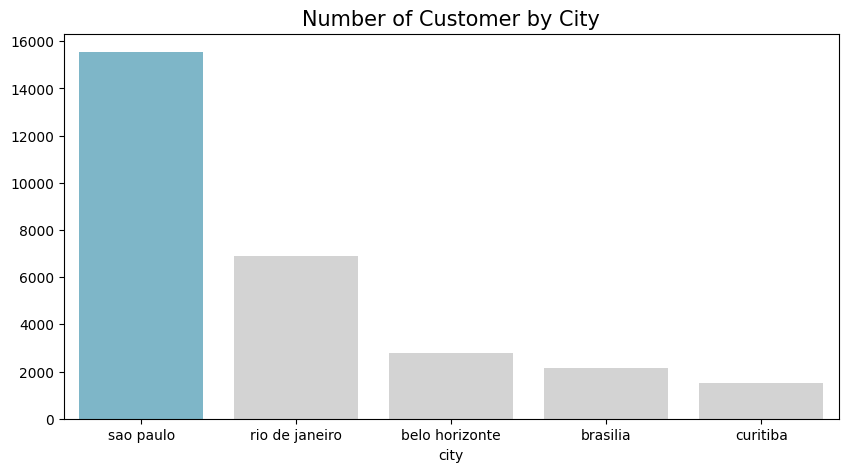

In [ ]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="amount_of_customers",
    x="customer_city",
    data= result.head(),
    palette=colors
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel('city')

In [ ]:
# number of customers by state
result_state = result.groupby('customer_state_full')['amount_of_customers'].sum().reset_index().sort_values(by='amount_of_customers', ascending=False)

Text(0.5, 0, 'state')

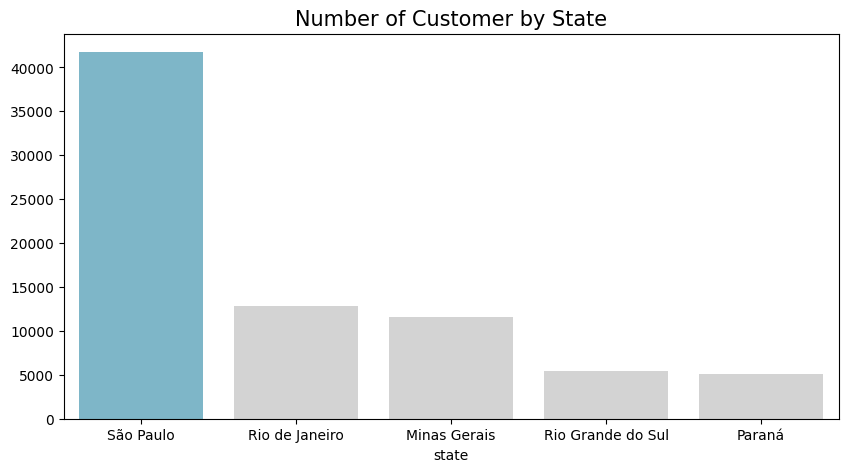

In [ ]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="amount_of_customers",
    x="customer_state_full",
    data= result_state.head(5),
    palette=colors
)
plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel('state')

1. **São Paulo, Rio de Janeiro, Minas Gerais, Rio Grande do Sul, dan Paraná** merupakan 5 negara yang paling banyak customer
2. Jika dilihat berdasarkan city maka **sao paulo, rio de janeiro, belo horizonte, brasilia, curitiba** merupakan 5 kota yang paling banyak customer

**State paling banyak customer adalah Sao Paulo mencapai lebih dari 41% total customer.**

### Question 2: Bagaimana demografi seller ?

Text(0.5, 0, 'city')

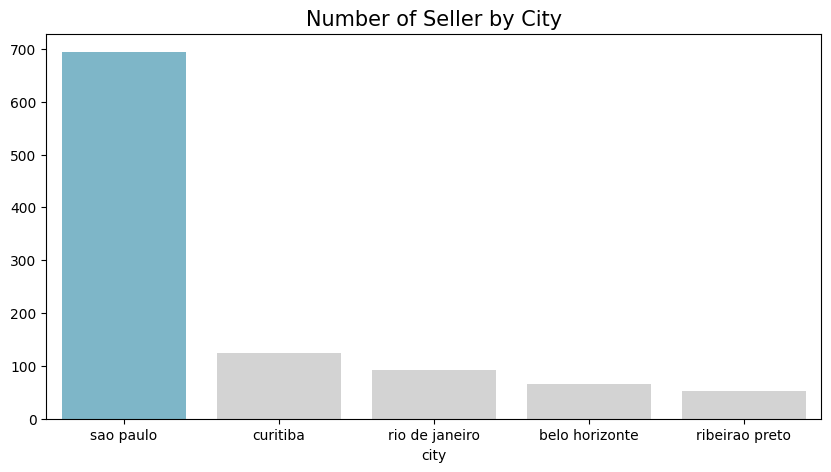

In [ ]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="seller_count",
    x="seller_city",
    data= sellers_city_df.head(),
    palette=colors
)
plt.title("Number of Seller by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel('city')

In [ ]:
# calculate seller by state
seller_state_df = sellers_city_df.groupby('seller_state_full')['seller_count'].sum().reset_index().sort_values(by='seller_count', ascending=False)

Text(0.5, 0, 'state')

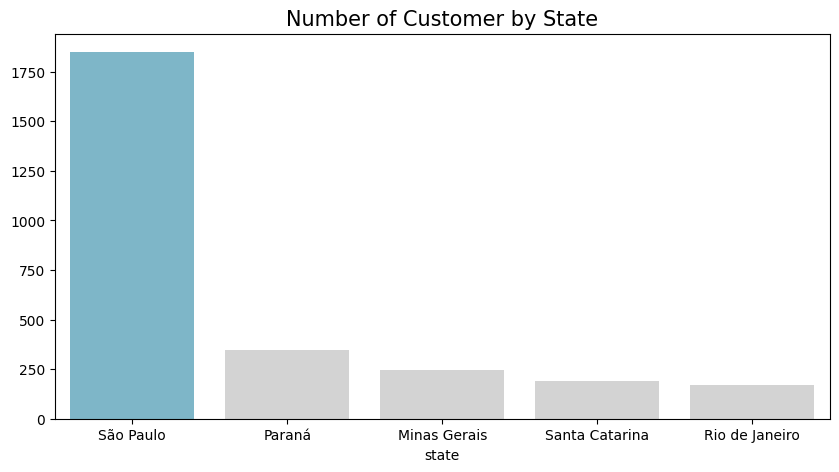

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="seller_count",
    x="seller_state_full",
    data= seller_state_df.head(5),
    palette=colors
)
plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel('state')

### Question 3 : Bagaimana order setiap tahunnya ?


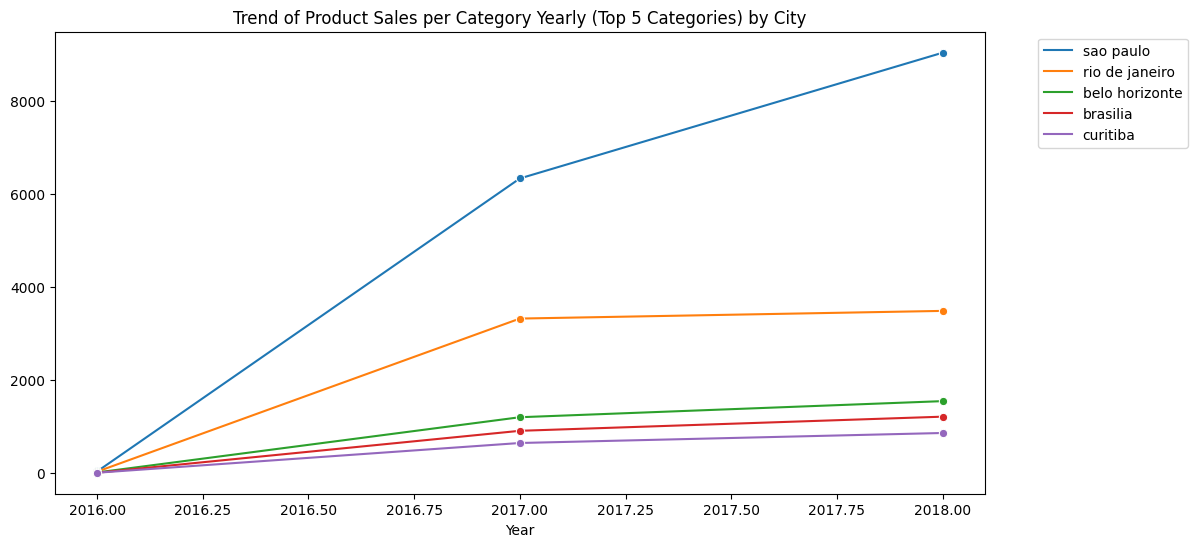

In [ ]:
# top 5 categories by city
top_city = orders_customers_df['customer_city'].value_counts().nlargest(5).index

# Category per year is only for the top 5 categories.
top_city_trend = order_per_year[order_per_year['customer_city'].isin(top_city)]

# Plot trend category per year
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_purchase_year', y='count_order', hue='customer_city', data=top_city_trend, marker='o')
plt.title('Trend of Product Sales per Category Yearly (Top 5 Categories) by City')
plt.xlabel('Year')
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placing the legend outside the plot.
plt.show()

In [ ]:
# group by customer state
order_per_year = order_per_year.groupby(['customer_state_full','order_purchase_year'])['count_order'].sum().reset_index()

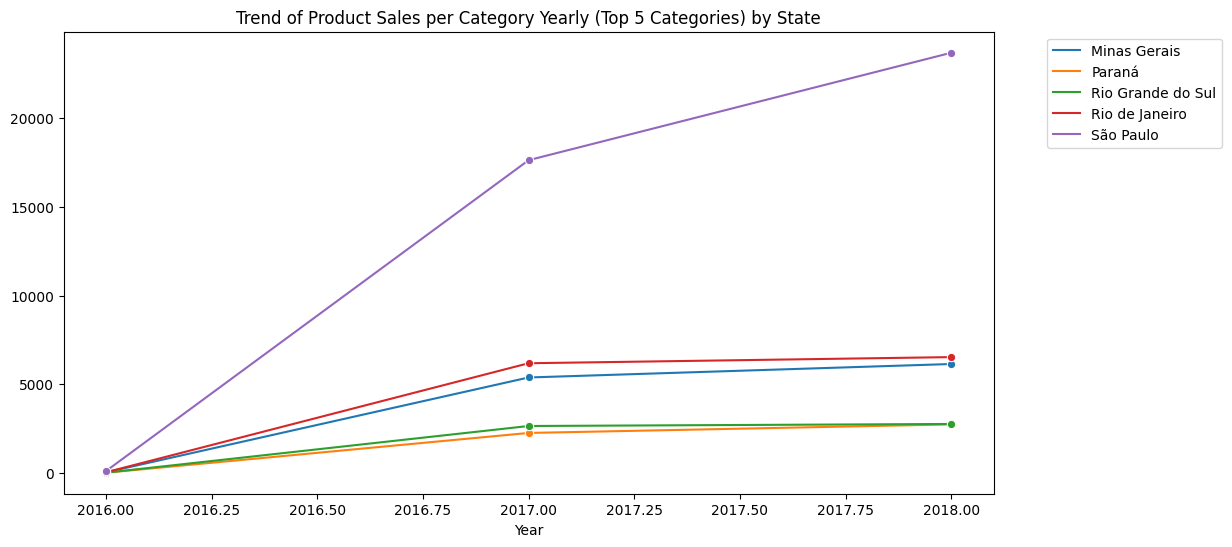

In [ ]:
# Ambil top 5 kategori teratas
top_state = orders_customers_df['customer_state_full'].value_counts().nlargest(5).index

# Filter DataFrame hanya untuk top kategori
top_state_trend = order_per_year[order_per_year['customer_state_full'].isin(top_state)]

# Plot tren kategori produk per tahun untuk top kategori
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_purchase_year', y='count_order', hue='customer_state_full', data=top_state_trend, marker='o')
plt.title('Trend of Product Sales per Category Yearly (Top 5 Categories) by State')
plt.xlabel('Year')
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar plot
plt.show()

1. State **paling banyak** melakukan order adalah **Sao Pulo, Rio de Janeiro dan Minas Gerais**.
2. **Sao Paulo, Rio De Janeiro , dan belo horizonte** adalah city yang **paling banyak** melakukan order.
3. **Setiap tahunnya kota Sao Paulo** adalah kota yang **paling banyak** order.

### Question 4 : Produk apa yang paling banyak dan paling sedikit terjual (tidak termasuk status order 'cancel') ?


In [ ]:
# calculate amount of item by product category
product_category_df = merged_df.groupby(['product_category_name'])['order_id'].count().reset_index(name='amount_of_item').sort_values(by='amount_of_item', ascending=False)

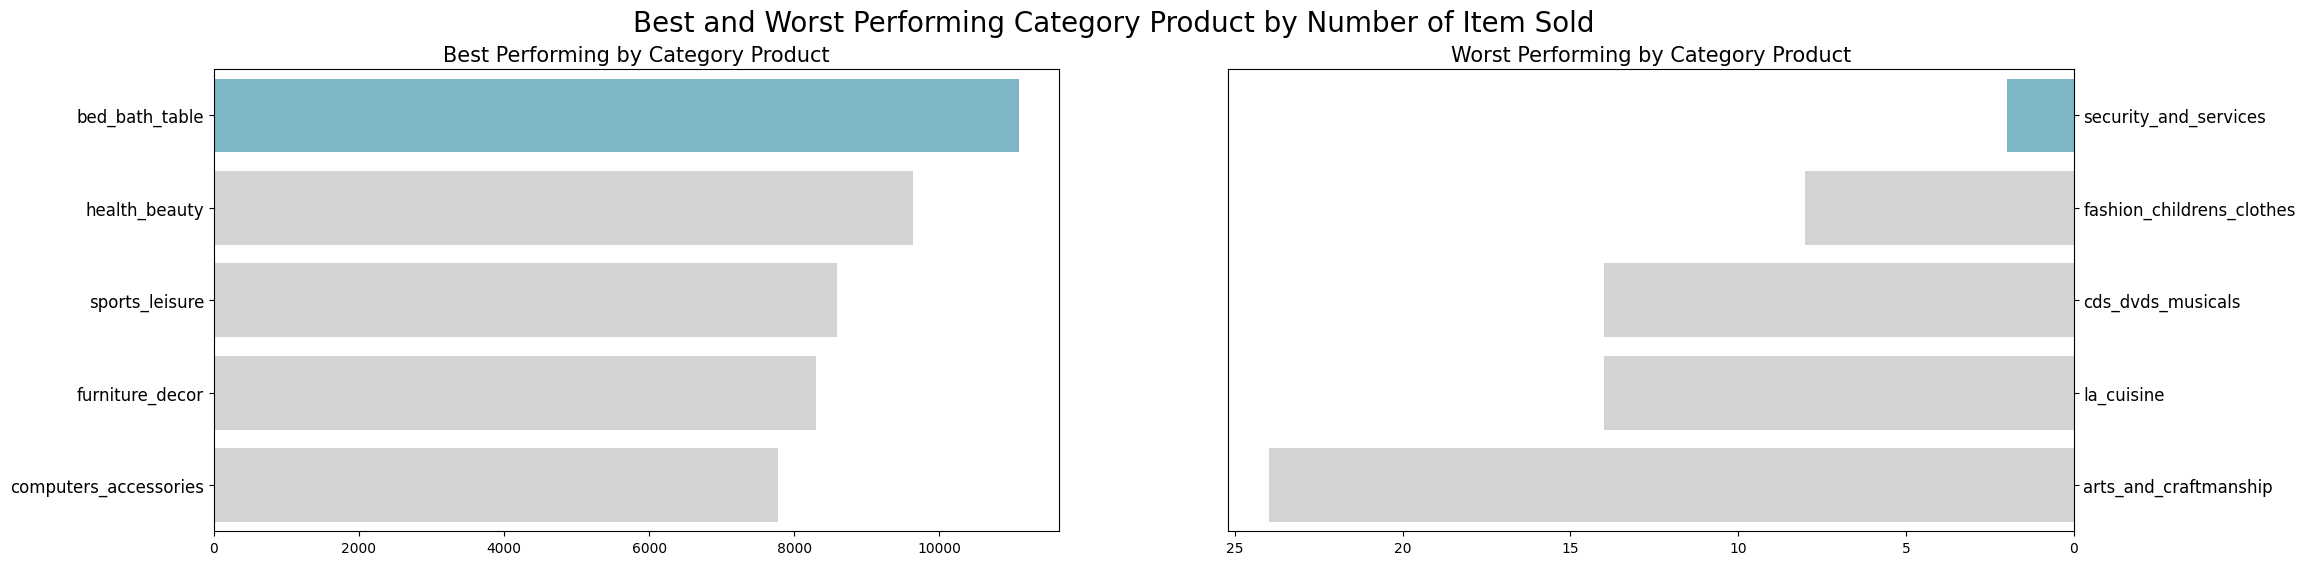

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(y="product_category_name", x="amount_of_item", data=product_category_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing by Category Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(y="product_category_name", x="amount_of_item", data=product_category_df.sort_values(by='amount_of_item', ascending=True).head(), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing by Category Product", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

plt.suptitle("Best and Worst Performing Category Product by Number of Item Sold", fontsize=20)
plt.show()

1. Kategori produk **paling laris** adalah **bed_bath_table, health_beauty,sports_leisure, furniture_decor, dan computers_accessories.**

2. Kategori produk **paling tidak laris** adalah **arts_and_craftmanship, cds_dvds_musicals, la_cuisine, fashion_childrens_clothes, security_and_services.**

### Question 5 : Bagaimana trend product category name terjual setiap tahunnya ?

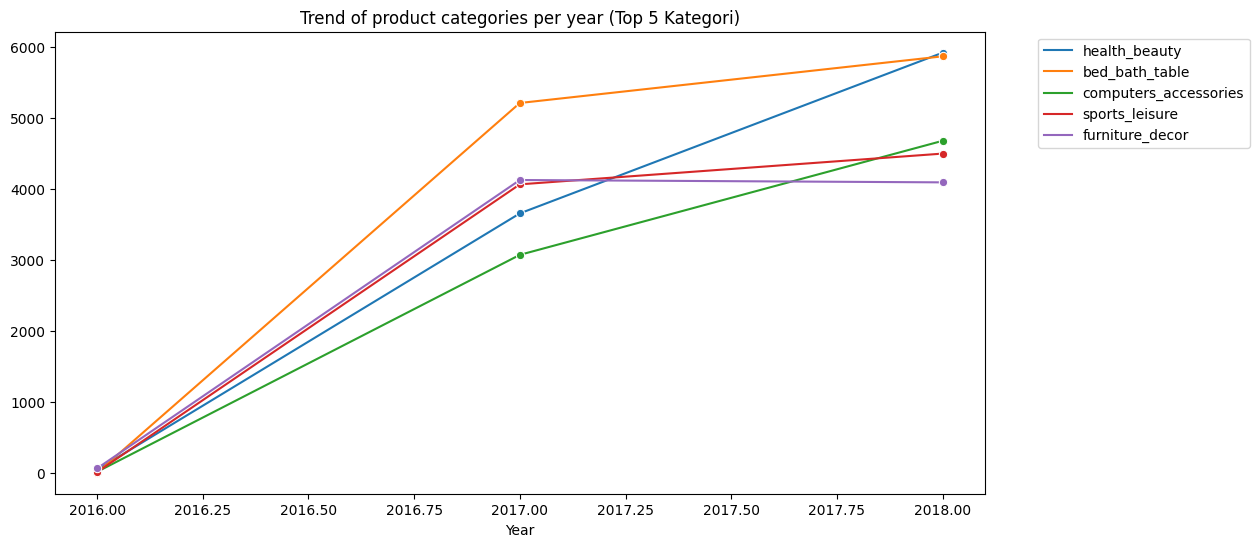

In [ ]:
# top 5 categories by product category name
top_categories = merged_df['product_category_name'].value_counts().nlargest(5).index

# Filter DataFrame only top 5 categories
top_category_trend = product_sales_per_year[product_sales_per_year['product_category_name'].isin(top_categories)]

# Plotting the trend of product categories per year for the top categories.
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_purchase_year', y='total_sales', hue='product_category_name', data=top_category_trend, marker='o')
plt.title('Trend of product categories per year (Top 5 Kategori)')
plt.xlabel('Year')
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # placing the legend outside the plot
plt.show()

**health beauty** merupakan category yang mengalami peningkatan signifikan setiap tahunnya.

### Question 6 : Produk apa yang paling banyak di cancel ?

In [ ]:
# grouping product sold by category on order status is 'canceled'
canceled_by_product_category = canceled_merged_df.groupby('product_category_name')['order_id'].count().reset_index(name='amount_of_item_canceled').sort_values(by='amount_of_item_canceled', ascending=False)

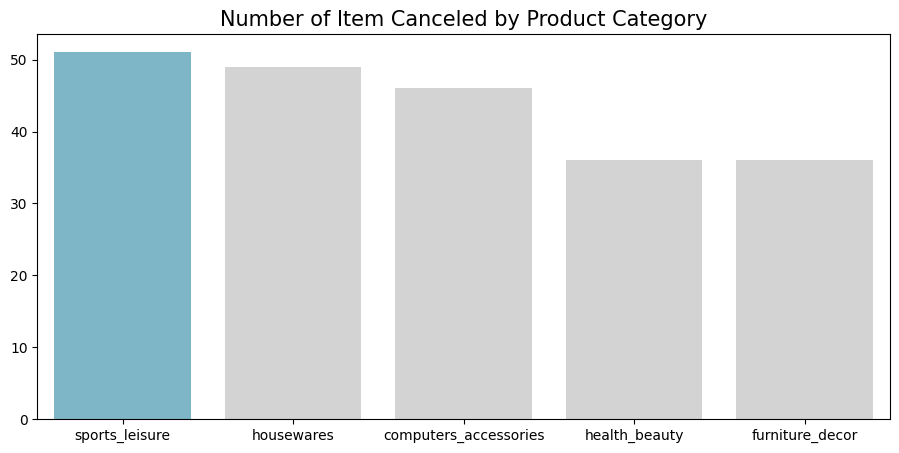

In [ ]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(11, 5))

sns.barplot(
    y="amount_of_item_canceled",
    x="product_category_name",
    data= canceled_by_product_category.head(),
    palette=colors
)
plt.title("Number of Item Canceled by Product Category", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

Sport Leisure merupakan product category yang paling banyak di cancel, diikuti category housewares, computer acessorios, health beauty dan furniture decor.

### Question 7 : Bagaimana Waktu Orders ?

In [ ]:
# Tambahkan kolom baru untuk jam
orders_df['purchase_hour'] = orders_df['order_purchase_timestamp'].dt.hour

# Tambahkan kolom baru untuk hari
orders_df['purchase_day'] = orders_df['order_purchase_timestamp'].dt.day_name()

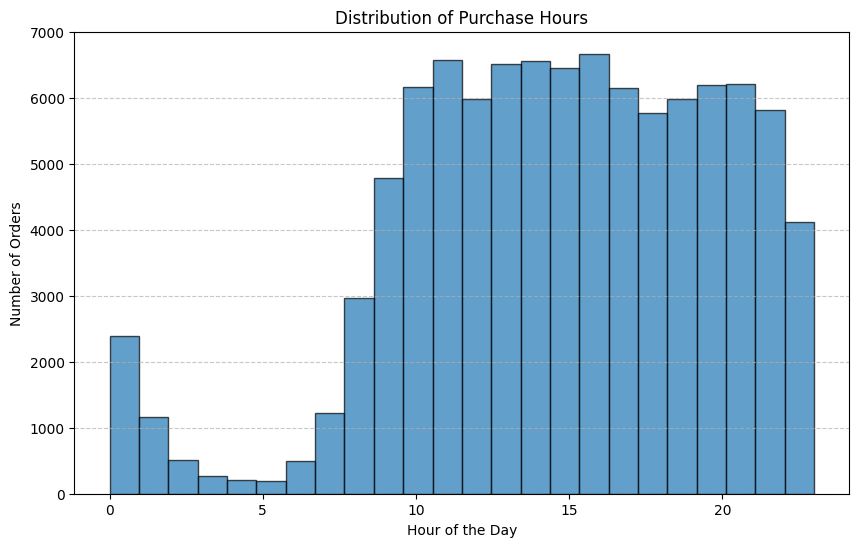

In [ ]:
# Plot histogram untuk menampilkan distribusi jam pembelian
plt.figure(figsize=(10, 6))
plt.hist(orders_df['purchase_hour'], bins=24, edgecolor='black', alpha=0.7)
plt.title('Distribution of Purchase Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

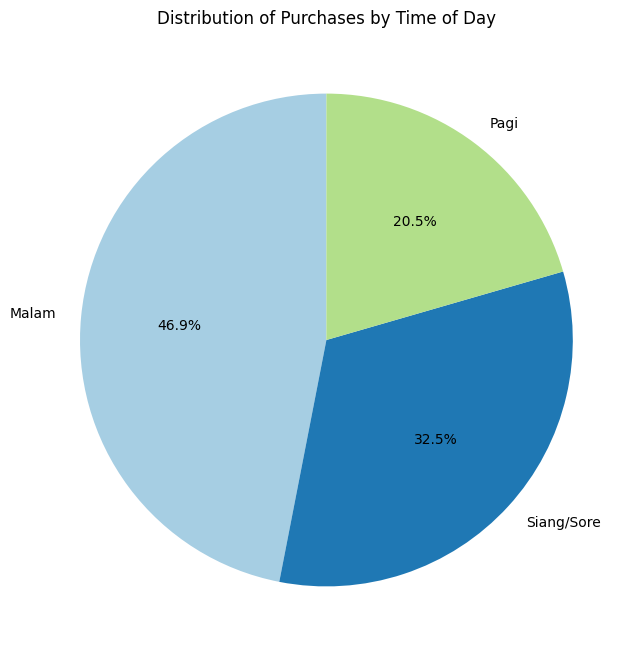

In [ ]:
# Kategorikan jam ke dalam pagi, siang, sore, dan malam
def categorize_time(hour):
    if 0 <= hour < 11:
        return 'Pagi'
    elif 13 <= hour < 18:
        return 'Siang/Sore'
    else:
        return 'Malam'

orders_df['purchase_time_category'] = orders_df['purchase_hour'].apply(categorize_time)

# Hitung jumlah pembelian untuk setiap kategori waktu
time_category_counts = orders_df['purchase_time_category'].value_counts()

# Plot pie chart untuk menampilkan distribusi pembelian berdasarkan kategori waktu
plt.figure(figsize=(8, 8))
plt.pie(time_category_counts, labels=time_category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Purchases by Time of Day')
plt.show()

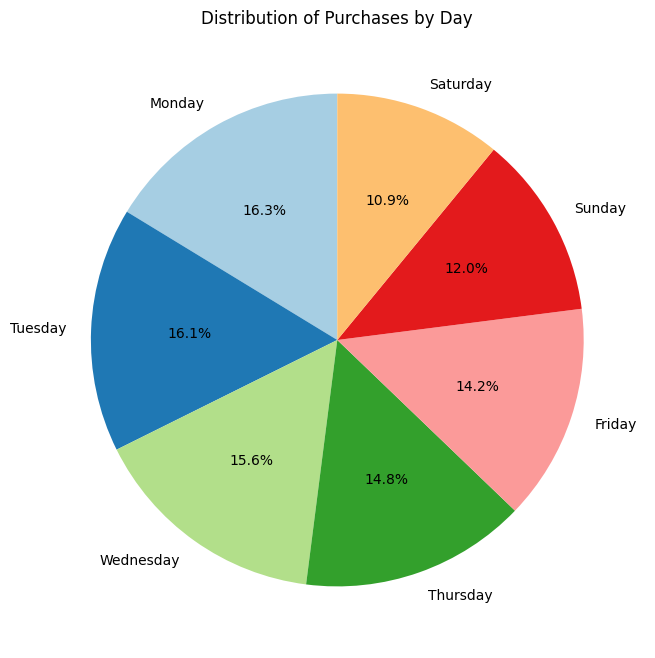

In [ ]:
# Hitung jumlah pembelian untuk setiap hari
day_counts = orders_df['purchase_day'].value_counts()

# Plot pie chart untuk menampilkan distribusi pembelian berdasarkan hari
plt.figure(figsize=(8, 8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Purchases by Day')
plt.show()

Transaksi paling banyak terjadi pada hari Senin.
Transaksi paling banyak dilakukan pada Malam hari.

### Question 7 - 9 (RFM)

- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

In [ ]:
# merge order items and customers
merged_df = pd.merge(merged_df, customers_df, how='left', on='customer_id')

In [ ]:
# grouping by customer
rfm_df = merged_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # get the date last order
    "order_id": "nunique", # calculate the total unique order
    "price": "sum" # calculate revenue
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# calculate the last order per customers
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = merged_df["order_purchase_timestamp"].dt.date.max() # last date order
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days) # calculate last date order - max order timestamp

rfm_df.drop("max_order_timestamp", axis=1, inplace=True) # drop column max_order_timestamp
rfm_df.head()

,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,119
2,0000f46a3911fa3c0805444483337064,1,69.00,542
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,326
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,293


In [ ]:
# show statistical descriptive
rfm_df.describe()

,frequency,monetary,recency
count,94989.000000,94989.000000,94989.000000
mean,1.033857,142.083909,243.362842
std,0.210804,216.096708,153.022220
min,1.000000,0.850000,0.000000
25%,1.000000,47.900000,119.000000
50%,1.000000,89.890000,224.000000
75%,1.000000,155.000000,352.000000
max,16.000000,13440.000000,729.000000


1. customer minimal melakukan transaksi 1x hingga 16x.
2. Uang yang dihabiskan mulai dari 0.85 hingga 13440.
3. Transaksi paling terbaru (2018-10-17) dan paling lama yaitu 729 hari sebelum transaksi terakhir.

In [ ]:
# Show 5 first recency
rfm_df.sort_values(by="recency", ascending=True).head()

,customer_id,frequency,monetary,recency
94654,ff22e30958c13ffe219db7d711e8f564,2,290.0,0
4662,0c6d7218d5f3fa14514fd29865269993,1,169.8,5
47581,7febafa06d9d8f232a900a2937f04338,1,45.9,5
12648,21dbe8eabd00b34492a939c540e2b1a7,1,6.9,5
68002,b701bebbdf478f5500348f03aff62121,1,24.9,5


Terakhir customer dengan id 'ff22e30958c13ffe219db7d711e8f564' melakukan transaksi 0 hari yang lalu.

In [ ]:
# Show 5 first frequency
rfm_df.sort_values(by="frequency", ascending=False).head()

,customer_id,frequency,monetary,recency
52354,8d50f5eadf50201ccdcedfb9e2ac8455,16,729.62,14
23199,3e43e6105506432c953e165fb2acf44c,9,1000.85,188
75209,ca77025e7201e3b30c44b472ff346268,7,806.61,94
10234,1b6c7548a2a1f9037c1fd3ddfed95f33,7,809.21,201
37371,6469f99c1f9dfae7733b25662e7f1782,7,664.20,67


Customer dengan id '8d50f5eadf50201ccdcedfb9e2ac8455' paling banyak melakukan 16 transaksi dengan monetary hanya R$729.62 atau pertransaksinya dia hanya menghabiskan 45.6 dan terakhir transaksi 14 hari yang lalu (sebelum 2018-10-17).

In [ ]:
# Show 5 first monetary
rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_id,frequency,monetary,recency
3788,0a0a92112bd4c708ca5fde585afaa872,1,13440.0,339
81015,da122df9eeddfedc1dc1f5349a1a690c,2,7388.0,520
43939,763c8b1c9c68a0229c42c9fc6f662b93,1,7160.0,50
81854,dc4802a71eae9be1dd28f5d788ceb526,1,6735.0,568
25902,459bef486812aa25204be022145caa62,1,6729.0,40


Customer dengan id '0a0a92112bd4c708ca5fde585afaa872' paling tinggi menghabiskan R$13440 namun transaksi oleh customer ini hanya 1x pada 383 hari sebelum 2018-10-17.

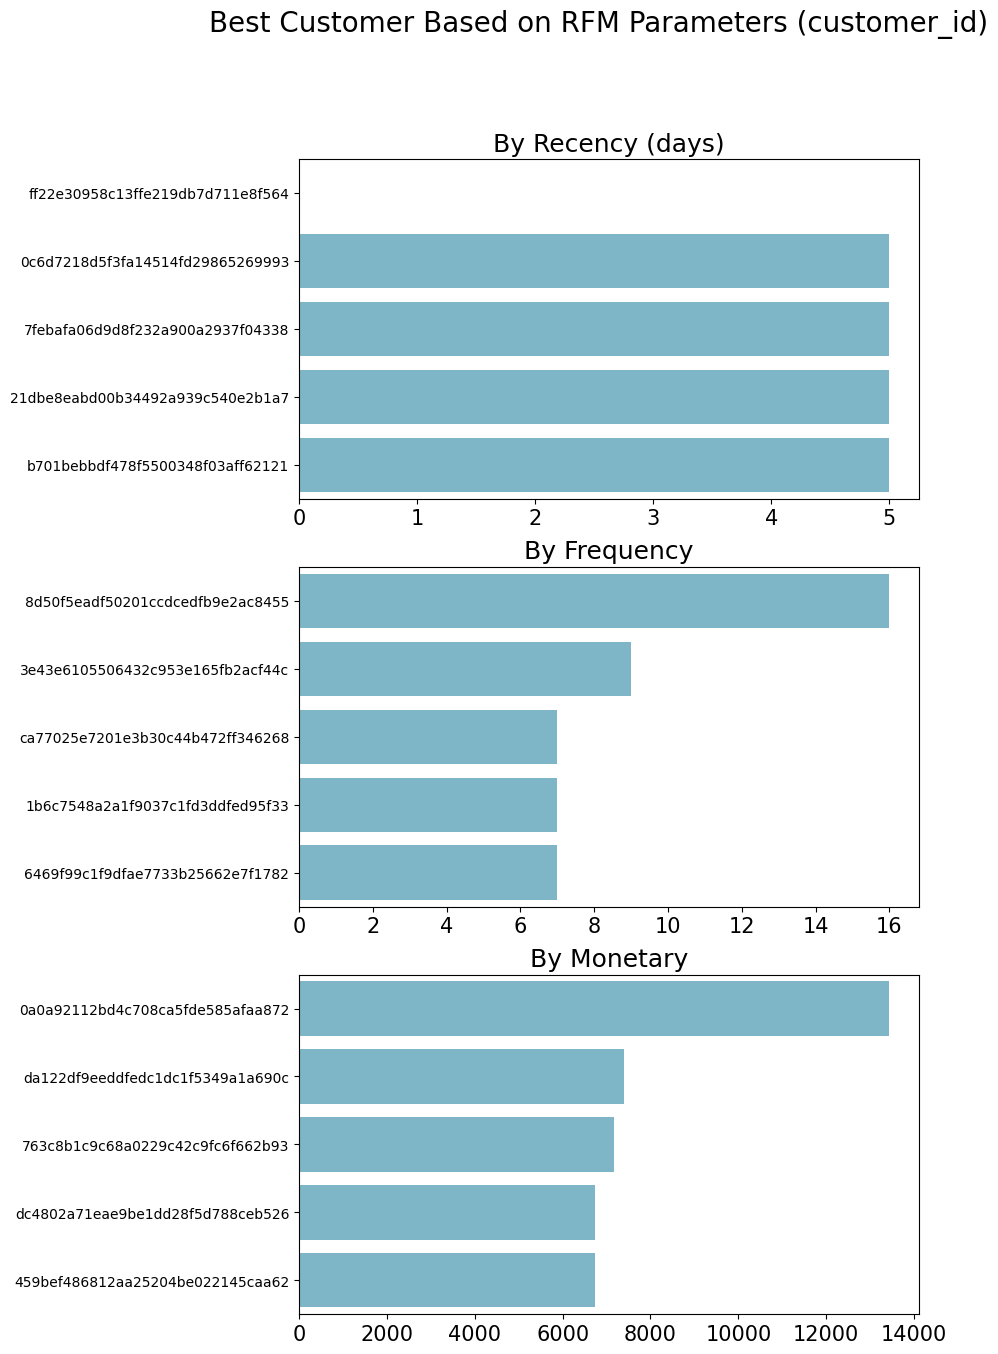

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x="recency", y="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(x="monetary", y="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)",ha='center', fontsize=20)
plt.show()

Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [ ]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)  # The smaller the recency, the better
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)  # The larger the frequency, the better
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)  # The larger the monetary, the better

# show 5 first data
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,116,72350.5,46051.5,64187.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,119,71374.0,46051.5,4162.5
2,0000f46a3911fa3c0805444483337064,1,69.00,542,3390.0,46051.5,37520.5
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,326,27313.5,46051.5,9546.5
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,293,32068.5,46051.5,76396.5


In [ ]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,116,76.167240,48.480877,67.573087
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,119,75.139227,48.480877,4.382086
2,0000f46a3911fa3c0805444483337064,1,69.00,542,3.568834,48.480877,39.499837
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,326,28.754382,48.480877,10.050111
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,293,33.760225,48.480877,80.426681


In [ ]:
# Calculate RFM score
# For recency, the weight is 0.15
# For frequency, the weight is 0.28
# For monetary, the weight is 0.57
rfm_df['RFM_score'] = 0.15 * rfm_df['r_rank_norm'] + 0.28 * rfm_df['f_rank_norm'] + 0.57 * rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05  # The maximum RFM score is 5
rfm_df = rfm_df.round(2)  # Rounding to 2 decimal places
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,3.18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.37
2,0000f46a3911fa3c0805444483337064,1.83
3,0000f6ccb0745a6a4b88665a16c9f078,1.18
4,0004aac84e0df4da2b147fca70cf8255,3.22
5,0004bd2a26a76fe21f786e4fbd80607f,3.32
6,00050ab1314c0e55a6ca13cf7181fecf,1.53


In [ ]:
# Customer segment categories from RFM score
# Define the segmentation based on RFM scores
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(5)

,customer_id,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,3.18,Medium value customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.37,lost customers
2,0000f46a3911fa3c0805444483337064,1.83,Low value customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.18,lost customers
4,0004aac84e0df4da2b147fca70cf8255,3.22,Medium value customer


In [ ]:
# calculate the total customer based on customer segment
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,2554
1,Low value customers,45884
2,Medium value customer,27915
3,Top customers,490
4,lost customers,18146


In [ ]:
# Assigning an order to the customer segment categories.
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

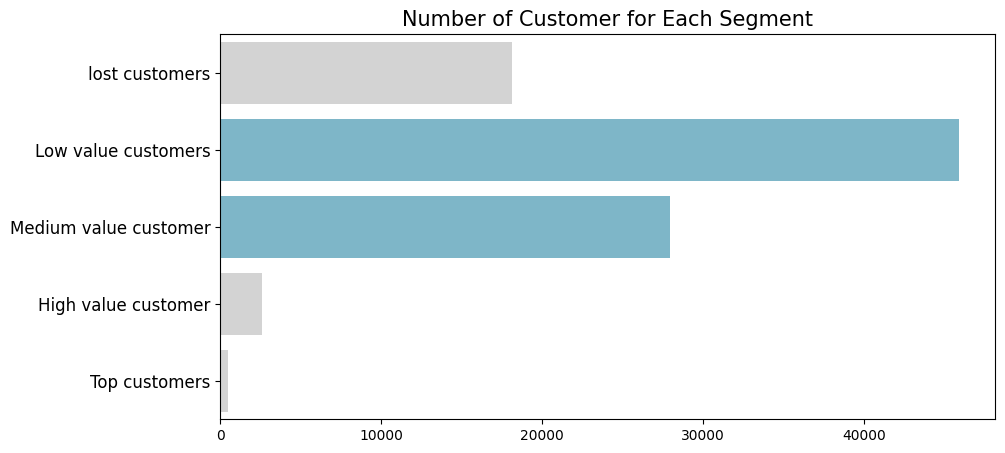

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

1. Ada 490 Top customers.
2. Ada 2554 High value customers.
3. Ada 27915 Medium value customers.
4. Ada 45884 Low value customers.
5. Ada 18146 Lost customers.

E-commerce didominasi oleh **Low Value customers dan Medium Value customers.**

## Conclusion

- Demografi pelanggan ?
  1. **São Paulo, Rio de Janeiro, Minas Gerais, Rio Grande do Sul, dan Paraná** merupakan 5 negara yang paling banyak customer
  2. **sao paulo, rio de janeiro, belo horizonte, brasilia, curitiba** merupakan 5 kota yang paling banyak customer
- Demografi seller ?
  1. Paling banyak seller berasal dari **Sao Paulo**, Kemudian **Parana dan Minas Gerais**.
  2. Seller paling banyak ada di kota **Sao Paulo** yaitu 694, kemudian kota **curitiba** 127 seller dan **Rio De Janeiro** dengan 93 seller.
- Bagaimana Order Setiap setiap tahunnya ?
  1. State **paling banyak** melakukan order adalah **Sao Pulo, Rio de Janeiro dan Minas Gerais**.
  2. **Sao Paulo, Rio De Janeiro , dan belo horizonte** adalah city yang **paling banyak** melakukan order.
  3. **Setiap tahunnya kota Sao Paulo** adalah kota yang **paling banyak** order.
- Kategori produk apa yang paling banyak dan paling sedikit terjual (tidak termasuk status order 'cancel') ?
  1. Kategori produk **paling laris** adalah **bed_bath_table, health_beauty,sports_leisure, furniture_decor, dan computers_accessories.**
  2. Kategori produk **paling tidak laris** adalah **arts_and_craftmanship,
  cds_dvds_musicals, la_cuisine, fashion_childrens_clothes, security_and_services.**
- Bagaimana trend product category name terjual setiap tahunnya ?
  1. Tahun 2016 category product yang paling laris adalah **furniture decor.**
  2. Tahun 2017 category product yang paling laris adalah **bed bath table.**
  3. Tahun 2018 category product yang paling laris adalah **health beauty.**
  4. **Health Beauty** merupakan category yang mengalami **peningkatan signifikan** setiap tahunnya.

  **Setiap tahunnya trend produk paling laris berbeda-beda.**
- Produk apa yang paling banyak di cancel ?
  1. **Sport Leisure** merupakan product category yang paling banyak di cancel, diikuti category **housewares, computer acessorios, health beauty dan furniture decor**.
- Bagaimana waktu orders?
  1. Transaksi paling banyak terjadi pada hari **Senin**.
  2. Transaksi paling banyak dilakukan pada **Malam** hari.
- Analisis RFM :
  1. Ada 490 Top customers.
  2. Ada 2554 High value customers.
  3. Ada 27915 Medium value customers.
  4. Ada 45884 Low value customers.
  5. Ada 18146 Lost customers.

  E-commerce didominasi oleh **Low Value customers dan Medium Value customers.**

## Merge all data for dashboard

In [ ]:
orders_df['order_purchase_year'] = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.year

In [ ]:
all_data = pd.merge(order_items_df, sellers_df, how='left', on='seller_id')
all_data = pd.merge(all_data, products_df, how='left', on = 'product_id')

In [ ]:
orders_all = pd.merge(orders_df, customers_df, how='left', on='customer_id')

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    112650 non-null  object        
 1   order_item_id               112650 non-null  int64         
 2   product_id                  112650 non-null  object        
 3   seller_id                   112650 non-null  object        
 4   shipping_limit_date         112650 non-null  datetime64[ns]
 5   price                       112650 non-null  float64       
 6   freight_value               112650 non-null  float64       
 7   seller_zip_code_prefix      112650 non-null  int64         
 8   seller_city                 112650 non-null  object        
 9   seller_state                112650 non-null  object        
 10  seller_state_full           112650 non-null  object        
 11  product_name_lenght         112650 non-

In [ ]:
orders_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 5   order_purchase_year            99441 non-null  int64         
 6   purchase_hour                  99441 non-null  int64         
 7   purchase_day                   99441 non-null  object        
 8   purchase_time_category         99441 non-null  object        
 9   customer_unique_id             99441 non-null  object        
 10  customer_zip_code_prefix       99441 non-null  int64         
 11  customer_city  

In [ ]:
# save to csv
all_data.to_csv(folder_path + 'order_items.csv', index=False)
orders_all.to_csv(folder_path+ 'orders.csv', index=False)